In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
# Let's draw one random number
x = np.random.random_sample()
print(x)

0.5954495332284032


In [4]:
np.random.seed(0)
x = np.random.random_sample(5)
print(x)
x = np.random.random_sample(5)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]


In [5]:
a=5
b=20
x = np.random.random_sample(10000)
y = (b-a)*x+a
print(y)

[16.87587557 12.9334238  13.52066842 ... 10.58037146  7.94258142
 17.10788368]


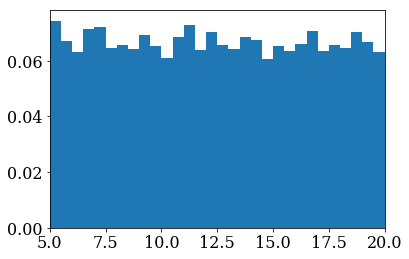

In [6]:
binwidth=0.5
plt.xlim(5,20)
plt.hist(y,bins=np.arange(5.,21., binwidth),normed=True);

### Generation of other random distributions

ditributions habituelles:
1) Gaussienne : $$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-0.5(\frac{x-\mu}{\sigma})^2}$$
2)exponentielle: $$x\leq 0 \quad p(x)=\alpha e^{-\alpha x}$$ $$x<0 \quad p(x)=0$$ 

Si les ditributions cumulatives sont connues et inversibles, on eput alors reproduire le générateur aléatoire correspondant en utilisant un générateur aléatoire uniforeme sur $[0,1]$. 

ex. distribution exponentielle: $$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

For $x\in [0, 1]$, the inverse of this distribution is thus,

$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

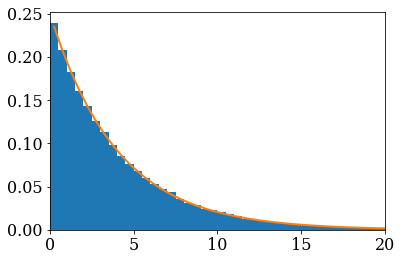

In [7]:
#on implémente le tout
alpha = 0.25 #vitesse de notre distribution
x =  np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

#plot
binwidth=0.5
plt.xlim(0,20)
bins=np.arange(0.,21., binwidth)
plt.hist(y, bins, normed =True);

#compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc, alpha*np.exp(-alpha*xc), lw=2)

### Von Neumann rejection method

on génère un set de nb aléatoires avec une certaine distribution p1 et on extrait ce qui obéit à p2. Pour cela il faut que $$p_2(x) \leq Kp_1(x) \quad \forall x $$

example: gaussienne positive, commençons par une exponentielle avec $\alpha=1$

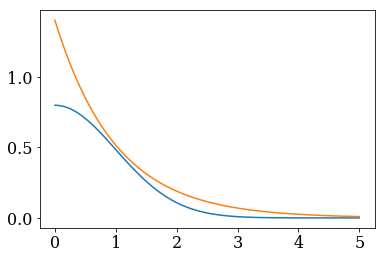

In [8]:
nx = 100

xi = np.linspace(0,5,nx)

f1=2*np.exp(-xi**2/2.0)/np.sqrt(2*np.pi)
f2=1.4*np.exp(-np.abs(xi))

plt.plot(xi,f1)
plt.plot(xi,f2)


fonctionnement de l'algorithme: 
1. on génère un nb x selon notre distribution exponentielle
2. on tire un nb au hasard U entre 0 et 1
3. on garde x si $U< \frac{p_2(x)}{Kp_1(x)}$



Size of accepted set h and expected size 1/K: 71370 71428.57142857143


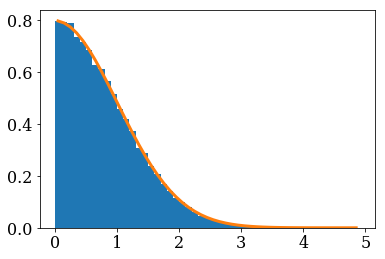

In [9]:
#nb de VA prises selon p1
N = 100000
K = 1.4

h=[]

for i in range(N):
    u1= np.random.random_sample()
    
    #distribution de g selon une exponentielle
    g = np.log(1/(1-u1))
    
    #on génère un 2e nb pour la cond d'accept/reject
    u2 = np.random.random_sample()
    
    #tri
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)/ \
            (K*np.exp(-g))
        
    if (u2<ratio):
        h.append(g)
        
#size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

#plots
binwidth=0.1
bins=np.arange(0.,5.,binwidth)
plt.hist(h, bins=np.arange(0.,5.,binwidth), normed=True);

#center of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), lw=3)

Acceptance ratio: 0.71551


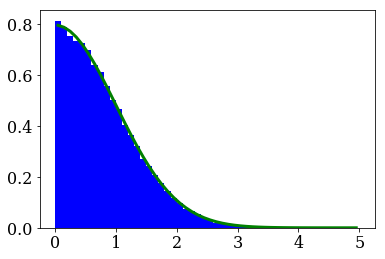

In [10]:
# Distribute g according to the exponential distribution
uniform1 = np.random.random_sample(N)
g = np.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = np.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = np.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = np.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
plt.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')


### Challenge

1) Regardez la librairie python sur les générateurs de nombres aléatoires et testez-en qq un. En particulier comparez le output de l'exponentielle et de la gaussienne avec les versions implémentées ci-dessus.

2) Une autre methode pour générer des nombres pour la gaussienne c'est l'algorithme de Box-Muller. Implémentez-le et testez-le.

9.154109232687674


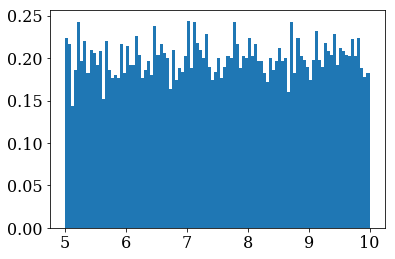

In [11]:
x=np.random.uniform(5,10)
print(x)

h=plt.hist(np.random.uniform(5,10,10000), bins=100, normed=True)
plt.show()

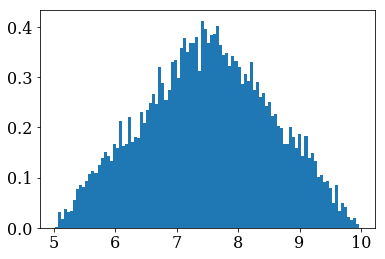

In [12]:
x=np.random.triangular(5, 7.5, 10,10000)



h=plt.hist(np.random.triangular(5,7.5,10,10000), bins=100, normed=True)
plt.show()

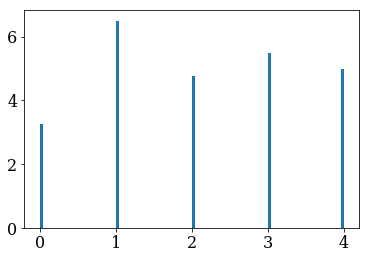

In [13]:
a=np.random.random_sample()
h=plt.hist(np.random.choice(5,100), bins=100, normed=True)
plt.show()

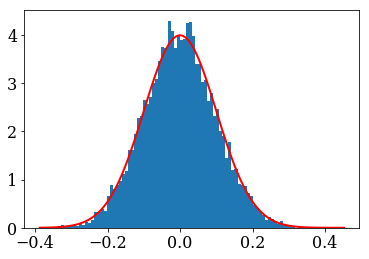

In [14]:
mu, sigma =0,0.1

gauss=np.random.normal(mu,sigma,10000)

#plots
count, bins, ignored=plt.hist(gauss, bins=100, normed=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')
plt.show()
#center of bins
#xc = bins[:-1] + binwidth/2
#plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), lw=3)

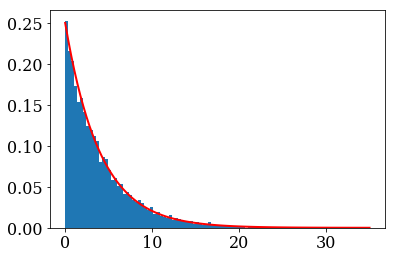

In [15]:
exp=np.random.exponential(4,10000)

#plots
count, bins, ignored=plt.hist(exp, bins=100, normed=True)
plt.plot(bins, 1/4*np.exp(-bins / 4), linewidth=2, color='r')
plt.show()

2) méthode de Box-Muller

consiste à générer des pairs de NA à distribution normale centrée réduite, à partir d'une source de nb aléatoires de loi uniforme.

**Forme cartésienne** 
On choisi indépendamment et uniformément x et y dans [-1,1], et $s=x² + y²$. Si $s \geq 1$ ou $s=0$, on rejete ce couple et on en retire un nouveau, jusqu'à ce que $s \in ]0,1[$.

Ensuite on calcul $$z_0=x\sqrt{\frac{-2lns}{s}}$$ 
$$z_1=y\sqrt{\frac{-2lns}{s}}$$

In [16]:
x=np.random.uniform(-1,1)
y=np.random.uniform(-1,1)
s=x**2+y**2
N=1000
for i in range(0,N):
    if s>=1 or s==0:
        x[i] = np.random.uniform(-1,1)
        y[i]= np.random.uniform(-1,1)
        s=x**2+y**2
    else: 
        z0=x*np.sqrt((-2*np.log(s))/s)
        z1=y*np.sqrt((-2*np.log(s))/s)
print(z0,z1)

0.44146236594648147 0.9112435466989689


### brownian motion

**equation stochastic pour le mvt brownien**

L'évolution de la molécule est donnée par: $dx=x(t+dt)-x(t)=ds$
Ou $ds$ décrit le déplacement résultant des collisions avec les molécules d'eau environnante. 

Modelisation de $ds$: $ds=\sqrt{2\alpha dt} N(0,1)$ avec $\alpha$ etant le même que dans l'éq de diffusion: $\frac{\partial \rho}{\partial t} = \alpha \frac{\partial² \rho}{\partial x²}$

Et à chaque instant dt, $N(0,1)$ est un NA générer à partir d'une distribution gaussienne $f(n)$, centré en 0 et de variance 1. $$f(n)=\frac{1}{\sqrt{2\pi}} e^{-0.5n²}$$

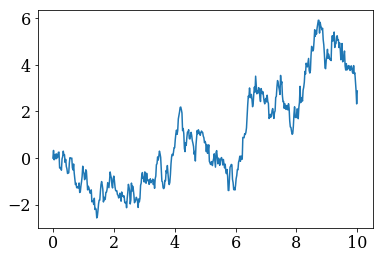

In [19]:
#commençons par suivre une particule, initialement au repos en x=0

T=10.0   #durée totale de simulation

nt=500   #nb de pas de temps 
dt=T/nt  #interval de temps

alpha=2.0    #coeff de diffusion

#C.I.
t = np.arange(0,T+dt, dt)
x = np.empty(nt+1)
x[0]=0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1)
    
plt.plot(t,x)

On a bel et bien que notre particule se déplace dans tout les sens (positif et négatif), mais on aimerait encore vérifier que ce model de ds permet bel et bien de reproduire le processus de diffusion.

Comparons donc à l'équation de diffusion: 

On aimerait maintenant suivre un échantillon de nos molécules. On peut décrire leur densité à partir de leur position: $ \rho(x,t)dx = n(x,t)/N$  avec $n(x.t)$ qui représente à un instant donné le nb de molécules dans un intervalle dx, centré en x et N est le nb total de molécule de l'échantillon.

Afin de tester ce modèle et de le comparer à la diffusion, on initialise la position de l'échantillon à l'aide d'une distribution gaussienne.

$$P(x) = \frac{1}{\sqrt{2\pi\sigma²}}e^{-\frac{(x-\mu)²}{2\sigma²}}$$

où $\sigma²$ est la variance et $\mu$ est la moyenne.

Or comme $n(x,0)=NP(x)dx$ on aura que $\rho (x,0)=P(x)$. Dans ce cas, la solution de l'ếq de diffusion est: $$\rho (x,t) = \frac{1}{\sqrt{2\pi\sigma_t²}}e^{-\frac{(x-\mu)²}{2\sigma_i²}}$$
avec $\sigma_t²=2\alpha t+\sigma²$

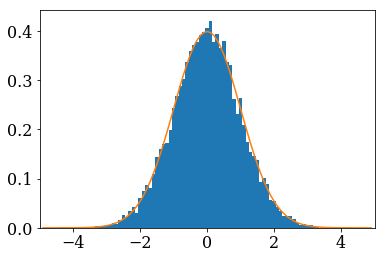

In [22]:
#commençons par initialiser la position de l'échnantillon

npart=10000

#on choisi u=0 (on le mettra simplement pas dans le calcul)
sigma = 1.0
x0 = np.random.normal(loc=0, scale=sigma, size=npart)

#creation de bins centré autour de 0
binwidth=0.1
bins=np.arange(-5,5, binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

plt.xlim(-5,5)
plt.hist(x0, bins, normed=True);
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))

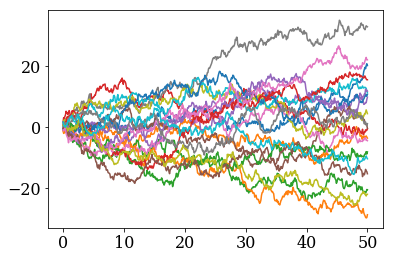

In [23]:
#Faisons maintenant un plot de qqes trajectoires

T=50.0
nt=500
dt=T/nt
alpha=2.0

t=np.arange(0,T+dt,dt)
x=np.empty([nt+1, npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)
    
for i in range(20):
    plt.plot(t,x[:,i])

Les molécules commencent toutes en 0, mais très vite leur trajectoire évolue et elle prennent toutes une direction différentes.

Regardons maintenant à quoi ressemble l'histo des positions à la fin de la simulation et comparons à la solution analytique:

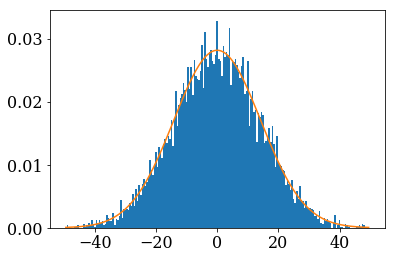

In [24]:
binwidth=0.5
bins= np.arange(-50,50,binwidth)
bins=bins+binwidth/2

bin_centers = bins[:-1]+binwidth/2

plt.hist(x[nt], bins, normed=True);

sigmat2=2*alpha*T+sigma**2
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

**Challenge**
Ajoutez une contribution systematic à dx: $dx=cdt + \sqrt{2\alpha dt}N(0,1)$

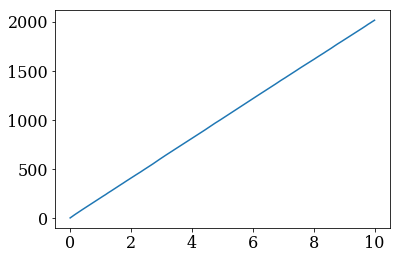

In [32]:
#commençons par suivre une particule, initialement au repos en x=0

T=10.0   #durée totale de simulation

nt=500   #nb de pas de temps 
dt=T/nt  #interval de temps

alpha=2.0    #coeff de diffusion
c=200    #cte à déterminer?

#C.I.
t = np.arange(0,T+dt, dt)
x = np.empty(nt+1)
x[0]=0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1)+c*dt
    
plt.plot(t,x)

On remarque que si c est très grand la trajectoire est une droite, et donc cette partie constante l'emporte sur la distribution aléatoire. 